<img style="float: left;" src="D2Klogo.png" width="20%"> 

<center>

# Welcome to DSCI 101 #
### Introduction to Data Science ###

- Case study notebook developped by Su Chen

<h1><center>World Happiness
</center></h1>

# Introduction

- "[The world happiness report](https://worldhappiness.report/) uses global survey data to report how people evaluate their own lives in more than 150 countries worldwide. The report is a publication of the Sustainable Development Solutions Network, a global initiative of the United Nations. The report primarily uses data from the [Gallup World Poll](https://en.wikipedia.org/wiki/Gallup,_Inc.#Gallup_World_Poll). Each annual report is available to the public to download on the World Happiness Report website."

- WHO publish [data](https://www.who.int/data/gho/data/themes/mental-health/suicide-rates) on suicide rates (per 100,000 population) for various countries over decades. 

Main questions we want to explore:
- Is the happiness score correlated to suicide rate?

In addition, we also want to create data visualization to explore trend of suicide rates over the years, comparing different countries, and demographic groups.

In [71]:
### standard imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# allows you to view the plots upon executing your code
%matplotlib inline
import seaborn as sns
# sets the plotting style, feel free to change!
plt.style.use('fivethirtyeight')
# prevents histogram bars to fuse together
plt.rcParams['patch.force_edgecolor'] = True

import warnings
# ignores warning message
warnings.filterwarnings('ignore')
# change max column display option
pd.options.display.max_columns = 50

# Data and Data Wrangling

In [72]:
# read in data: world happiness report
happiness = pd.read_csv('world_happiness.csv')
print('(rows, columns): '+str(happiness.shape))
happiness

(rows, columns): (1230, 11)


Year      Country  Happiness_Rank  Happiness_Score  \
0     2015  Switzerland               1            7.590   
1     2015      Iceland               2            7.560   
2     2015      Denmark               3            7.530   
3     2015       Norway               4            7.520   
4     2015       Canada               5            7.430   
...    ...          ...             ...              ...   
1225  2022     Botswana             142            3.471   
1226  2022       Rwanda             143            3.268   
1227  2022     Zimbabwe             144            2.995   
1228  2022      Lebanon             145            2.955   
1229  2022  Afghanistan             146            2.404   

      Explained by: Log GDP per capita  Explained by: Social support  \
0                                1.400                         1.350   
1                                1.300                         1.400   
2                                1.330                         1.360   
3                                1.460                         1.330   
4                                1.330                         1.320   
...                                ...                           ...   
1225                             1.503                         0.815   
1226                             0.785                         0.133   
1227                             0.947                         0.690   
1228                             1.392                         0.498   
1229                             0.758                         0.000   

      Explained by: Healthy life expectancy  \
0                                     0.940   
1                                     0.950   
2                                     0.870   
3                                     0.890   
4                                     0.910   
...                                     ...   
1225                                  0.280   
1226                                  0.462   
1227                                  0.270   
1228                                  0.631   
1229                                  0.289   

      Explained by: Freedom to make life choices  Explained by: Generosity  \
0                                          0.670                     0.300   
1                                          0.630                     0.440   
2                                          0.650                     0.340   
3                                          0.670                     0.350   
4                                          0.630                     0.460   
...                                          ...                       ...   
1225                                       0.571                     0.012   
1226                                       0.621                     0.187   
1227                                       0.329                     0.106   
1228                                       0.103                     0.082   
1229                                       0.000                     0.089   

      Explained by: Perceptions of corruption  Dystopia + residual  
0                                       0.420                 2.52  
1                                       0.140                 2.70  
2                                       0.480                 2.49  
3                                       0.370                 2.47  
4                                       0.330                 2.45  
...                                       ...                  ...  
1225                                    0.102                 0.29  
1226                                    0.544                 1.08  
1227                                    0.105                 0.65  
1228                                    0.034                 0.25  
1229                                    0.005                 1.27  

[1230 rows x 11 columns]

In [73]:
# check missing values: no missing values, great!
happiness.isna().sum()

Year                                          0
Country                                       0
Happiness_Rank                                0
Happiness_Score                               0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

We first check for what years do we have data on. Notice for each year, the count represent how many countries we have the happiness score collected for that year. 

In [74]:
# check what years do we have data on
# sort index so it is easier to see the years
happiness['Year'].value_counts().sort_index()

2015    158
2016    157
2017    155
2018    156
2019    156
2020    153
2021    149
2022    146
Name: Year, dtype: int64

In [75]:
# read in data: who suicide data
who = pd.read_csv('who_suicide_statistics.csv')
print('(rows, columns): '+str(who.shape))
who

(rows, columns): (43776, 6)


country  year     sex          age  suicides_no  population
0       Albania  1985  female  15-24 years          NaN    277900.0
1       Albania  1985  female  25-34 years          NaN    246800.0
2       Albania  1985  female  35-54 years          NaN    267500.0
3       Albania  1985  female   5-14 years          NaN    298300.0
4       Albania  1985  female  55-74 years          NaN    138700.0
...         ...   ...     ...          ...          ...         ...
43771  Zimbabwe  1990    male  25-34 years        150.0         NaN
43772  Zimbabwe  1990    male  35-54 years        132.0         NaN
43773  Zimbabwe  1990    male   5-14 years          6.0         NaN
43774  Zimbabwe  1990    male  55-74 years         74.0         NaN
43775  Zimbabwe  1990    male    75+ years         13.0         NaN

[43776 rows x 6 columns]

We can already see lots of missing values in the who suicide statistics data. We will probably have to drop all records with missing values in this case. But before that, we also check how many years do we have data on.

In [76]:
# check missing values: lots of numbers missing
who.isna().sum()

country           0
year              0
sex               0
age               0
suicides_no    2256
population     5460
dtype: int64

In [77]:
# check what years do we have data on
who['year'].value_counts().sort_index()

1979     672
1980     804
1981     996
1982     936
1983     948
1984     840
1985    1080
1986    1080
1987    1128
1988    1056
1989    1056
1990    1128
1991    1092
1992    1068
1993    1056
1994    1116
1995    1152
1996    1152
1997    1188
1998    1200
1999    1236
2000    1344
2001    1404
2002    1416
2003    1392
2004    1380
2005    1380
2006    1356
2007    1320
2008    1404
2009    1452
2010    1404
2011    1380
2012    1332
2013    1320
2014    1248
2015     960
2016     300
Name: year, dtype: int64

For our purpose, we will filter out the years that can be matched up witht the world happiness report, and aggregate numbers on country level. We decide use the year 2015, which has data on 70 countries, given that the 2016 who data only include 18 countries.

In [78]:
# drop missing values
who_2015 = who[who['year']==2015].dropna()
# group by country to aggregate demographic groups
suic_stat_2015 = who_2015[['country','suicides_no', 'population']].groupby('country').sum()
# calculate suicide stat
suic_stat_2015['suicides_per_100k'] = suic_stat_2015['suicides_no']*100000 / suic_stat_2015['population']
# reset index to get the country column back
suic_stat_2015.reset_index(inplace=True)
suic_stat_2015

country  suicides_no   population  suicides_per_100k
0        Antigua and Barbuda          1.0      91889.0           1.088270
1                  Argentina       3073.0   39699624.0           7.740627
2                    Armenia         74.0    2795335.0           2.647268
3                      Aruba          9.0      98712.0           9.117433
4                  Australia       3027.0   22240785.0          13.610131
..                       ...          ...          ...                ...
65                   Ukraine       7574.0   40345446.0          18.772875
66            United Kingdom       4910.0   61082942.0           8.038251
67  United States of America      44189.0  300078511.0          14.725813
68                   Uruguay        630.0    3190795.0          19.744296
69      Virgin Islands (USA)          3.0      97951.0           3.062756

[70 rows x 4 columns]

In [79]:
# we filter out the happiness report data for 2015 as well
happiness_2015 = happiness[happiness['Year']==2015]
happiness_2015

Year      Country  Happiness_Rank  Happiness_Score  \
0    2015  Switzerland               1             7.59   
1    2015      Iceland               2             7.56   
2    2015      Denmark               3             7.53   
3    2015       Norway               4             7.52   
4    2015       Canada               5             7.43   
..    ...          ...             ...              ...   
153  2015       Rwanda             154             3.47   
154  2015        Benin             155             3.34   
155  2015        Syria             156             3.01   
156  2015      Burundi             157             2.91   
157  2015         Togo             158             2.84   

     Explained by: Log GDP per capita  Explained by: Social support  \
0                                1.40                          1.35   
1                                1.30                          1.40   
2                                1.33                          1.36   
3                                1.46                          1.33   
4                                1.33                          1.32   
..                                ...                           ...   
153                              0.22                          0.77   
154                              0.29                          0.35   
155                              0.66                          0.47   
156                              0.02                          0.42   
157                              0.21                          0.14   

     Explained by: Healthy life expectancy  \
0                                     0.94   
1                                     0.95   
2                                     0.87   
3                                     0.89   
4                                     0.91   
..                                     ...   
153                                   0.43   
154                                   0.32   
155                                   0.72   
156                                   0.22   
157                                   0.28   

     Explained by: Freedom to make life choices  Explained by: Generosity  \
0                                          0.67                      0.30   
1                                          0.63                      0.44   
2                                          0.65                      0.34   
3                                          0.67                      0.35   
4                                          0.63                      0.46   
..                                          ...                       ...   
153                                        0.59                      0.23   
154                                        0.48                      0.18   
155                                        0.16                      0.47   
156                                        0.12                      0.20   
157                                        0.36                      0.17   

     Explained by: Perceptions of corruption  Dystopia + residual  
0                                       0.42                 2.52  
1                                       0.14                 2.70  
2                                       0.48                 2.49  
3                                       0.37                 2.47  
4                                       0.33                 2.45  
..                                       ...                  ...  
153                                     0.55                 0.67  
154                                     0.08                 1.63  
155                                     0.19                 0.33  
156                                     0.10                 1.83  
157                                     0.11                 1.57  

[158 rows x 11 columns]

## Data merge

The best we can do here is to merge by country names, since we don't have identifiers like iso code.

In [80]:
# use outer merge to keep all the data in both dataframe
# we don't want to throw away records due to mismatch
merged_2015 = happiness_2015.merge(suic_stat_2015, how='outer',
                                 left_on='Country', right_on='country')
# check missing values
merged_2015.isna().sum()

Year                                           17
Country                                        17
Happiness_Rank                                 17
Happiness_Score                                17
Explained by: Log GDP per capita               17
Explained by: Social support                   17
Explained by: Healthy life expectancy          17
Explained by: Freedom to make life choices     17
Explained by: Generosity                       17
Explained by: Perceptions of corruption        17
Dystopia + residual                            17
country                                       105
suicides_no                                   105
population                                    105
suicides_per_100k                             105
dtype: int64

In [81]:
# find the countries missing in happiness report
merged_2015[merged_2015['Year'].isna()]

Year Country  Happiness_Rank  Happiness_Score  \
158   NaN     NaN             NaN              NaN   
159   NaN     NaN             NaN              NaN   
160   NaN     NaN             NaN              NaN   
161   NaN     NaN             NaN              NaN   
162   NaN     NaN             NaN              NaN   
163   NaN     NaN             NaN              NaN   
164   NaN     NaN             NaN              NaN   
165   NaN     NaN             NaN              NaN   
166   NaN     NaN             NaN              NaN   
167   NaN     NaN             NaN              NaN   
168   NaN     NaN             NaN              NaN   
169   NaN     NaN             NaN              NaN   
170   NaN     NaN             NaN              NaN   
171   NaN     NaN             NaN              NaN   
172   NaN     NaN             NaN              NaN   
173   NaN     NaN             NaN              NaN   
174   NaN     NaN             NaN              NaN   

     Explained by: Log GDP per capita  Explained by: Social support  \
158                               NaN                           NaN   
159                               NaN                           NaN   
160                               NaN                           NaN   
161                               NaN                           NaN   
162                               NaN                           NaN   
163                               NaN                           NaN   
164                               NaN                           NaN   
165                               NaN                           NaN   
166                               NaN                           NaN   
167                               NaN                           NaN   
168                               NaN                           NaN   
169                               NaN                           NaN   
170                               NaN                           NaN   
171                               NaN                           NaN   
172                               NaN                           NaN   
173                               NaN                           NaN   
174                               NaN                           NaN   

     Explained by: Healthy life expectancy  \
158                                    NaN   
159                                    NaN   
160                                    NaN   
161                                    NaN   
162                                    NaN   
163                                    NaN   
164                                    NaN   
165                                    NaN   
166                                    NaN   
167                                    NaN   
168                                    NaN   
169                                    NaN   
170                                    NaN   
171                                    NaN   
172                                    NaN   
173                                    NaN   
174                                    NaN   

     Explained by: Freedom to make life choices  Explained by: Generosity  \
158                                         NaN                       NaN   
159                                         NaN                       NaN   
160                                         NaN                       NaN   
161                                         NaN                       NaN   
162                                         NaN                       NaN   
163                                         NaN                       NaN   
164                                         NaN                       NaN   
165                                         NaN                       NaN   
166                                         NaN                       NaN   
167                                         NaN                       NaN   
168                                         NaN                       NaN   


We can see that some of these countries missing needs to be manually fixed: due to different way of spelling and name conventions.

In [82]:
# to see all the country names, print the values
# sort them before print
missing = merged_2015.loc[merged_2015['country'].isna(), 'Country'].values
print(np.sort(missing))

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Azerbaijan' 'Bahrain'
 'Bangladesh' 'Belarus' 'Benin' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Bulgaria' 'Burkina Faso' 'Burundi'
 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'China'
 'Comoros' 'Congo (Brazzaville)' 'Congo (Kinshasa)' 'Costa Rica'
 'Djibouti' 'Dominican Republic' 'El Salvador' 'Ethiopia' 'France' 'Gabon'
 'Ghana' 'Guinea' 'Haiti' 'Honduras' 'Hong Kong' 'India' 'Indonesia'
 'Iran' 'Iraq' 'Ireland' 'Ivory Coast' 'Jamaica' 'Jordan' 'Kenya' 'Kosovo'
 'Kuwait' 'Laos' 'Lebanon' 'Lesotho' 'Liberia' 'Libya' 'Macedonia'
 'Madagascar' 'Malawi' 'Malaysia' 'Mali' 'Mauritania' 'Moldova' 'Mongolia'
 'Montenegro' 'Morocco' 'Mozambique' 'Myanmar' 'Nepal' 'New Zealand'
 'Niger' 'Nigeria' 'North Cyprus' 'Oman' 'Pakistan'
 'Palestinian Territories' 'Paraguay' 'Peru' 'Philippines' 'Portugal'
 'Russia' 'Rwanda' 'Saudi Arabia' 'Senegal' 'Sierra Leone' 'Slovakia'
 'Somaliland region' 'South Korea' 'Sri Lanka' '

In [83]:
# country names need to be manually replaced to match up
name_dict = {'Republic of Korea':'South Korea', 
             'Hong Kong SAR':'Hong Kong',
             'Iran (Islamic Rep of)':'Iran',
            'Russian Federation':'Russia',
            'United States of America':'United States'}
# replace in the suic df
suic_stat_2015['country'] = suic_stat_2015['country'].replace(name_dict)
suic_stat_2015

country  suicides_no   population  suicides_per_100k
0    Antigua and Barbuda          1.0      91889.0           1.088270
1              Argentina       3073.0   39699624.0           7.740627
2                Armenia         74.0    2795335.0           2.647268
3                  Aruba          9.0      98712.0           9.117433
4              Australia       3027.0   22240785.0          13.610131
..                   ...          ...          ...                ...
65               Ukraine       7574.0   40345446.0          18.772875
66        United Kingdom       4910.0   61082942.0           8.038251
67         United States      44189.0  300078511.0          14.725813
68               Uruguay        630.0    3190795.0          19.744296
69  Virgin Islands (USA)          3.0      97951.0           3.062756

[70 rows x 4 columns]

In [84]:
# merge again using inner 
merged = happiness_2015.merge(suic_stat_2015, how='inner',
                                 left_on='Country', right_on='country')
print(merged.shape)
merged.head()

(58, 15)


Year      Country  Happiness_Rank  Happiness_Score  \
0  2015  Switzerland               1             7.59   
1  2015      Iceland               2             7.56   
2  2015      Denmark               3             7.53   
3  2015       Norway               4             7.52   
4  2015      Finland               6             7.41   

   Explained by: Log GDP per capita  Explained by: Social support  \
0                              1.40                          1.35   
1                              1.30                          1.40   
2                              1.33                          1.36   
3                              1.46                          1.33   
4                              1.29                          1.32   

   Explained by: Healthy life expectancy  \
0                                   0.94   
1                                   0.95   
2                                   0.87   
3                                   0.89   
4                                   0.89   

   Explained by: Freedom to make life choices  Explained by: Generosity  \
0                                        0.67                      0.30   
1                                        0.63                      0.44   
2                                        0.65                      0.34   
3                                        0.67                      0.35   
4                                        0.64                      0.23   

   Explained by: Perceptions of corruption  Dystopia + residual      country  \
0                                     0.42                 2.52  Switzerland   
1                                     0.14                 2.70      Iceland   
2                                     0.48                 2.49      Denmark   
3                                     0.37                 2.47       Norway   
4                                     0.41                 2.62      Finland   

   suicides_no  population  suicides_per_100k  
0       1073.0   7892502.0          13.595182  
1         40.0    308554.0          12.963695  
2        564.0   5383060.0          10.477312  
3        590.0   4882909.0          12.082961  
4        731.0   5181797.0          14.107075

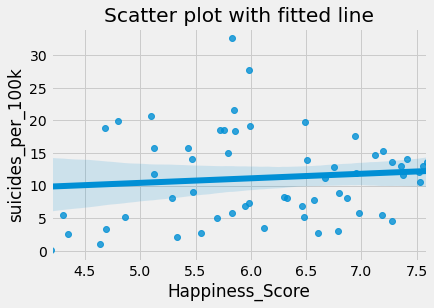

In [89]:
# scatter plot with a regression line!
sns.regplot(data=merged, x='Happiness_Score', y='suicides_per_100k')
plt.title('Scatter plot with fitted line');

In [87]:
import statsmodels.api as sm

# fit a linear regression model 
model = sm.OLS.from_formula('suicides_per_100k ~ Happiness_Score', data=merged)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      suicides_per_100k   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.5338
Date:                Sat, 17 Sep 2022   Prob (F-statistic):              0.468
Time:                        15:44:38   Log-Likelihood:                -192.65
No. Observations:                  58   AIC:                             389.3
Df Residuals:                      56   BIC:                             393.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.9206      5.923      1.168      0.248      -4.944      18.785
Happiness_Score     0.6975      0.955      0.731      0.468      -1.215       2.610
==============================================================================
Omnibus:                        7.517   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                6.762
Skew:                           0.799   Prob(JB):                       0.0340
Kurtosis:                       3.497   Cond. No.                         42.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the 2015 data we have for 58 countries, it does not look like there is a correlation between suicide rates and happiness scores. If we fit a linear regression using suicide rates as response, the slope is positive (which is counter intuitive) but not significant. We will need to have more data and further analysis to make any conclusion. 

# Suicide statistics - data visualization

We first create a function to compare suicide stats over the years among different countries.

In [25]:
# print out some countries to select from
who['country'].value_counts().head(20)

Iceland                     456
United Kingdom              456
Hungary                     456
Romania                     456
United States of America    456
Netherlands                 456
Mauritius                   456
Israel                      456
Sweden                      456
Austria                     456
Denmark                     444
Argentina                   444
Luxembourg                  444
Puerto Rico                 444
Mexico                      444
Ecuador                     444
Cuba                        444
Finland                     444
Switzerland                 444
Malta                       444
Name: country, dtype: int64

In [27]:
def plot_suicide_stat(df, country):
    '''
    a function to create line plot to compare suicide stats 
    for different countries over the years
    input: df is the dataframe
           country is a list of countries
    output: line plot to compare suicide stat
    '''
    df = df[df['country'].isin(country)].dropna()
    # create pivot table to calculate suicide stat
    pop_pivot = df.pivot_table(index='year', columns='country', values='population', aggfunc='sum')
    sui_pivot = df.pivot_table(index='year', columns='country', values='suicides_no', aggfunc='sum')
    # calculate suicide stat
    sui_stat = sui_pivot*100000 / pop_pivot
    # make plot and add title
    sui_stat.plot(title='Suicide no. per 100k population')
    # this puts the legend on the side so not to cover up the plot
    plt.legend(bbox_to_anchor=(1.0, 1.0));

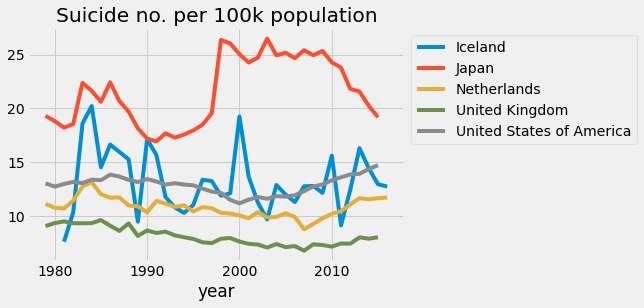

In [28]:
country_list = ['United States of America', 'United Kingdom', 'Japan', 'Iceland', 'Netherlands']
plot_suicide_stat(df=who, country=country_list)

Next, we create a function to visually comparing suicide statistic (number of suicides per 100,000 population) over the years, for a particular country, comparing demographic grous such as gender and age groups.

In [22]:
def plot_suicide_stat(df=who, country='United States of America', demo='sex'):
    '''
    a function to create line plot for suicide stats over the year
    input: df is the dataframe
           country is for filtering country
           demo is the demographic group to compare, 
                can only be sex (default) or age
    output: line plot to compare suicide stat over years
    '''
    # filter out country then drop missing values
    country_df = df[df['country']==country].dropna()
    title = 'Suicide no. per 100k for '+country
    
    # calculate suicide stats
    if demo=='sex': 
        # if compare by sex use margins=True in pivot_table to have total
        margin=True
    else:
        # if compare by age, do not include margin
        # otherwise too many lines, color will be recycled
        margin=False
        
    # create pivot table to calculate suicide stat
    pop_pivot = country_df.pivot_table(index='year', columns=demo, values='population', aggfunc='sum', margins=margin)
    sui_pivot = country_df.pivot_table(index='year', columns=demo, values='suicides_no', aggfunc='sum', margins=margin)
    # calculate suicide stat
    sui_stat = sui_pivot*100000 / pop_pivot
    # make plot and add title
    sui_stat.plot(title=title)
    # this puts the legend on the side so not to cover up the plot
    plt.legend(bbox_to_anchor=(1.0, 1.0));

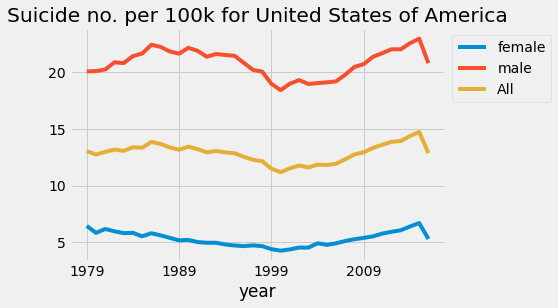

In [23]:
# example of calling the function
plot_suicide_stat(country='United States of America', demo='sex')

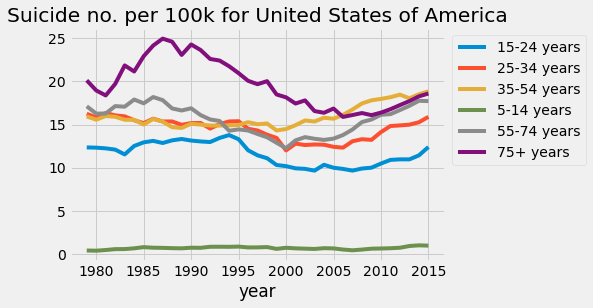

In [24]:
# example of calling the function
plot_suicide_stat(country='United States of America', demo='age')

# Discussion
- Based on the limited data, it does not look like there is a correlation between suicide rates and happiness scores. This makes sense because happiness is such an abstract notion to quantify and measure.
- In the US, the suicide rate for men is more than 3 times higher than suicide rate for women, see [Gender differences in suicide](https://en.wikipedia.org/wiki/Gender_differences_in_suicide#:~:text=United%20States,-Main%20article%3A%20Suicide&text=Since%20the%201950s%2C%20typically%20males,suicide%20rates%20in%20the%20US.). This is somehow superising because it is known that Women are nearly twice as likely as men to be diagnosed with depression according to [Mayo Clinic](https://www.mayoclinic.org/diseases-conditions/depression/in-depth/depression/art-20047725#:~:text=Women%20are%20nearly%20twice%20as,alone%20don't%20cause%20depression.). 
- This analysis has major limitation due to inadequate data quantity and quality. See [countries by suicide rate](https://en.wikipedia.org/wiki/List_of_countries_by_suicide_rate) based on more data. 
- Based on the US data, there is a trend of positive correlation between suicide rates with age. See CDC published result with more data [here](https://www.cdc.gov/nchs/products/databriefs/db464.htm)